# Kerr-Newman spacetime

This worksheet demonstrates a few capabilities of <a href="http://sagemanifolds.obspm.fr/">SageManifolds</a> (version 0.9.1) in computations regarding Kerr-Newman spacetime.

Click [here](https://raw.githubusercontent.com/sagemanifolds/SageManifolds/master/Worksheets/v0.9.1/SM_Kerr_Newman.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath within the Jupyter notebook, via the command `sage -n jupyter`

First we set up the notebook to display mathematical objects using LaTeX formatting:

In [1]:
%display latex

We also define a viewer for 3D plots (use `'jmol'` for interactive 3D graphics):

In [2]:
viewer3D = 'tachyon' # must be 'jmol', 'tachyon' or None (default)

Since some computations are quite long, we ask for running them in parallel on 8 cores:

In [3]:
Parallelism().set(nproc=8)

## Spacetime manifold

We declare the Kerr-Newman spacetime as a 4-dimensional diffentiable manifold:

In [4]:
M = Manifold(4, 'M', r'\mathcal{M}')

<p>Let us use the standard <strong>Boyer-Lindquist coordinates</strong> on it, by first introducing the part $\mathcal{M}_0$ covered by these coordinates</p>

In [5]:
M0 = M.open_subset('M0', r'\mathcal{M}_0')
# BL = Boyer-Lindquist
BL.<t,r,th,ph> = M0.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi') 
print(BL) ; BL

Chart (M0, (t, r, th, ph))


Chart (M0, (t, r, th, ph))

<h2>Metric tensor</h2>
<p>The 3 parameters $m$, $a$ and $q$ of the Kerr-Newman spacetime are declared as symbolic variables:</p>

In [6]:
var('m a q')

(m, a, q)

<p>Let us introduce the spacetime metric:</p>

In [7]:
g = M.lorentzian_metric('g')

<p>The metric is defined by its components in the coordinate frame associated with Boyer-Lindquist coordinates, which is the current manifold's default frame:</p>

In [8]:
rho2 = r^2 + (a*cos(th))^2
Delta = r^2 -2*m*r + a^2 + q^2
g[0,0] = -1 + (2*m*r-q^2)/rho2
g[0,3] = -a*sin(th)^2*(2*m*r-q^2)/rho2
g[1,1], g[2,2] = rho2/Delta, rho2
g[3,3] = (r^2 + a^2 + (2*m*r-q^2)*(a*sin(th))^2/rho2)*sin(th)^2
g.display()

g = (-(q^2 - 2*m*r)/(a^2*cos(th)^2 + r^2) - 1) dt*dt + (q^2 - 2*m*r)*a*sin(th)^2/(a^2*cos(th)^2 + r^2) dt*dph + (a^2*cos(th)^2 + r^2)/(a^2 + q^2 - 2*m*r + r^2) dr*dr + (a^2*cos(th)^2 + r^2) dth*dth + (q^2 - 2*m*r)*a*sin(th)^2/(a^2*cos(th)^2 + r^2) dph*dt - ((q^2 - 2*m*r)*a^2*sin(th)^2/(a^2*cos(th)^2 + r^2) - a^2 - r^2)*sin(th)^2 dph*dph

<p><span id="cell_outer_11">The list of the non-vanishing components:</span></p>

In [9]:
g.display_comp()

g_t,t = -(q^2 - 2*m*r)/(a^2*cos(th)^2 + r^2) - 1 
g_t,ph = (q^2 - 2*m*r)*a*sin(th)^2/(a^2*cos(th)^2 + r^2) 
g_r,r = (a^2*cos(th)^2 + r^2)/(a^2 + q^2 - 2*m*r + r^2) 
g_th,th = a^2*cos(th)^2 + r^2 
g_ph,t = (q^2 - 2*m*r)*a*sin(th)^2/(a^2*cos(th)^2 + r^2) 
g_ph,ph = -((q^2 - 2*m*r)*a^2*sin(th)^2/(a^2*cos(th)^2 + r^2) - a^2 - r^2)*sin(th)^2

<p>The component $g^{tt}$ of the inverse metric:</p>

In [10]:
g.inverse()[0,0]

(a^4 + 2*a^2*r^2 + r^4 - (a^4 + a^2*q^2 - 2*a^2*m*r + a^2*r^2)*sin(th)^2)/(2*m*r^3 - r^4 - (a^2 + q^2)*r^2 - (a^4 + a^2*q^2 - 2*a^2*m*r + a^2*r^2)*cos(th)^2)

<p>The lapse function:</p>

In [11]:
N = 1/sqrt(-(g.inverse()[[0,0]])) ; N

Scalar field on the Open subset M0 of the 4-dimensional differentiable manifold M

In [12]:
N.display()

M0 --> R
(t, r, th, ph) |--> sqrt(a^2*cos(th)^2 + r^2)*sqrt(a^2 + q^2 - 2*m*r + r^2)/sqrt(a^4 + 2*a^2*r^2 + r^4 - (a^4 + a^2*q^2 - 2*a^2*m*r + a^2*r^2)*sin(th)^2)

<h2>Electromagnetic field tensor</h2>
<p>Let us first introduce the 1-form basis associated with Boyer-Lindquist coordinates:</p>

In [13]:
dBL = BL.coframe() ; dBL

Coordinate coframe (M0, (dt,dr,dth,dph))

<p>The electromagnetic field tensor $F$ is formed as [cf. e.g. Eq. (33.5) of Misner, Thorne & Wheeler (1973)]</p>

In [14]:
F = M.diff_form(2, name='F')
F.set_restriction( q/rho2^2 * (r^2-a^2*cos(th)^2)* dBL[1].wedge( dBL[0] - a*sin(th)^2* dBL[3] ) + \
    2*q/rho2^2 * a*r*cos(th)*sin(th)* dBL[2].wedge( (r^2+a^2)* dBL[3] - a* dBL[0] ) )
F.display()

F = (a^2*q*cos(th)^2 - q*r^2)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) dt/\dr + 2*a^2*q*r*cos(th)*sin(th)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) dt/\dth + (a^3*q*cos(th)^2 - a*q*r^2)*sin(th)^2/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) dr/\dph + 2*(a^3*q*r + a*q*r^3)*cos(th)*sin(th)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) dth/\dph

<p>The list of non-vanishing components:</p>

In [15]:
F.display_comp()

F_t,r = (a^2*q*cos(th)^2 - q*r^2)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) 
F_t,th = 2*a^2*q*r*cos(th)*sin(th)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) 
F_r,t = -(a^2*q*cos(th)^2 - q*r^2)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) 
F_r,ph = (a^3*q*cos(th)^2 - a*q*r^2)*sin(th)^2/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) 
F_th,t = -2*a^2*q*r*cos(th)*sin(th)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) 
F_th,ph = 2*(a^3*q*r + a*q*r^3)*cos(th)*sin(th)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) 
F_ph,r = -(a^3*q*cos(th)^2 - a*q*r^2)*sin(th)^2/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) 
F_ph,th = -2*(a^3*q*r + a*q*r^3)*cos(th)*sin(th)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4)

<p>The Hodge dual of $F$:</p>

In [16]:
star_F = F.hodge_dual(g) ; star_F.display()

*F = 2*a*q*r*cos(th)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) dt/\dr - (a^3*q*cos(th)^2 - a*q*r^2)*sin(th)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) dt/\dth - 2*(a^4*q*r*cos(th)*sin(th)^4 - (a^4*q*r + a^2*q*r^3)*cos(th)*sin(th)^2)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) dr/\dph + ((a^4*q + a^2*q*r^2)*sin(th)^3 - (a^4*q - q*r^4)*sin(th))/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) dth/\dph

<h3>Maxwell equations</h3>

<p>Let us check that $F$ obeys the two (source-free) Maxwell equations:</p>

In [17]:
F.exterior_derivative().display()

dF = 0

In [18]:
star_F.exterior_derivative().display()

d*F = 0

<h2>Levi-Civita Connection</h2>

<p>The Levi-Civita connection $\nabla$ associated with $g$:</p>

In [19]:
nab = g.connection() ; print(nab)

Levi-Civita connection nabla_g associated with the Lorentzian metric g on the 4-dimensional differentiable manifold M


<p>Let us verify that the covariant derivative of $g$ with respect to $\nabla$ vanishes identically:</p>

In [20]:
nab(g) == 0

True

<p>Another view of the above property:</p>

In [21]:
nab(g).display()

nabla_g(g) = 0

<p><span id="cell_outer_13">The nonzero Christoffel symbols (skipping those that can be deduced by symmetry of the last two indices):</span></p>

In [22]:
g.christoffel_symbols_display()

Gam^t_t,r = (a^4*m + a^2*q^2*r + q^2*r^3 - m*r^4 - (a^4*m + a^2*m*r^2)*sin(th)^2)/(2*m*r^5 - r^6 - (a^2 + q^2)*r^4 - (a^6 + a^4*q^2 - 2*a^4*m*r + a^4*r^2)*cos(th)^4 + 2*(2*a^2*m*r^3 - a^2*r^4 - (a^4 + a^2*q^2)*r^2)*cos(th)^2) 
Gam^t_t,th = (a^2*q^2 - 2*a^2*m*r)*cos(th)*sin(th)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) 
Gam^t_r,ph = -(a^3*q^2*r - a^3*m*r^2 + 2*a*q^2*r^3 - 3*a*m*r^4 - (a^5*m + a^3*q^2*r - a^3*m*r^2)*cos(th)^4 + (a^5*m - 2*a*q^2*r^3 + 3*a*m*r^4)*cos(th)^2)/(2*m*r^5 - r^6 - (a^2 + q^2)*r^4 - (a^6 + a^4*q^2 - 2*a^4*m*r + a^4*r^2)*cos(th)^4 + 2*(2*a^2*m*r^3 - a^2*r^4 - (a^4 + a^2*q^2)*r^2)*cos(th)^2) 
Gam^t_th,ph = ((a^5*q^2 - 2*a^5*m*r)*cos(th)*sin(th)^5 - (a^5*q^2 - 2*a^5*m*r + a^3*q^2*r^2 - 2*a^3*m*r^3)*cos(th)*sin(th)^3)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^r_t,t = (m*r^4 - (2*m^2 + q^2)*r^3 + (a^2*m + 3*m*q^2)*r^2 - (a^4*m + a^2*m*q^2 - 2*a^2*m^2*r + a^2*m*r^2)*cos(th)^2 - (a^2*q^2 + q^4)*r)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^r_t,ph = -(a*m*r^4 - (2*a*m^2 + a*q^2)*r^3 + (a^3*m + 3*a*m*q^2)*r^2 - (a^5*m + a^3*m*q^2 - 2*a^3*m^2*r + a^3*m*r^2)*cos(th)^2 - (a^3*q^2 + a*q^4)*r)*sin(th)^2/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^r_r,r = -(a^2*m + q^2*r - m*r^2 - (a^2*m - a^2*r)*sin(th)^2)/(2*m*r^3 - r^4 - (a^2 + q^2)*r^2 - (a^4 + a^2*q^2 - 2*a^2*m*r + a^2*r^2)*cos(th)^2) 
Gam^r_r,th = -a^2*cos(th)*sin(th)/(a^2*cos(th)^2 + r^2) 
Gam^r_th,th = (2*m*r^2 - r^3 - (a^2 + q^2)*r)/(a^2*cos(th)^2 + r^2) 
Gam^r_ph,ph = ((a^2*m*r^4 - (2*a^2*m^2 + a^2*q^2)*r^3 + (a^4*m + 3*a^2*m*q^2)*r^2 - (a^6*m + a^4*m*q^2 - 2*a^4*m^2*r + a^4*m*r^2)*cos(th)^2 - (a^4*q^2 + a^2*q^4)*r)*sin(th)^4 + (2*m*r^6 - r^7 - (a^2 + q^2)*r^5 + (2*a^4*m*r^2 - a^4*r^3 - (a^6 + a^4*q^2)*r)*cos(th)^4 + 2*(2*a^2*m*r^4 - a^2*r^5 - (a^4 + a^2*q^2)*r^3)*cos(th)^2)*sin(th)^2)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^th_t,t = (a^2*q^2 - 2*a^2*m*r)*cos(th)*sin(th)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^th_t,ph = -(a^3*q^2 - 2*a^3*m*r + a*q^2*r^2 - 2*a*m*r^3)*cos(th)*sin(th)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^th_r,r = -a^2*cos(th)*sin(th)/(2*m*r^3 - r^4 - (a^2 + q^2)*r^2 - (a^4 + a^2*q^2 - 2*a^2*m*r + a^2*r^2)*cos(th)^2) 
Gam^th_r,th = r/(a^2*cos(th)^2 + r^2) 
Gam^th_th,th = -a^2*cos(th)*sin(th)/(a^2*cos(th)^2 + r^2) 
Gam^th_ph,ph = -((a^6 + a^4*q^2 - 2*a^4*m*r + a^4*r^2)*cos(th)^5 - 2*(2*a^2*m*r^3 - a^2*r^4 - (a^4 + a^2*q^2)*r^2)*cos(th)^3 - (a^4*q^2 - 2*a^4*m*r + 2*a^2*q^2*r^2 - 4*a^2*m*r^3 - a^2*r^4 - r^6)*cos(th))*sin(th)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) 
Gam^ph_t,r = (a^3*m*cos(th)^2 + a*q^2*r - a*m*r^2)/(2*m*r^5 - r^6 - (a^2 + q^2)*r^4 - (a^6 + a^4*q^2 - 2*a^4*m*r + a^4*r^2)*cos(th)^4 + 2*(2*a^2*m*r^3 - a^2*r^4 - (a^4 + a^2*q^2)*r^2)*cos(th)^2) 
Gam^ph_t,th = (a*q^2 - 2*a*m*r)*cos(th)/((a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4)*sin(th)) 
Gam^ph_r,ph = -(a^2*q^2*r - a^2*m*r^2 + q^2*r^3 - 2*m*r^4 + r^5 - (a^4*m - a^4*r)*cos(th)^4 + (a^4*m - a^2*m*r^2 + 2*a^2*r^3)*cos(th)^2)/(2*m*r^5 - r^6 - (a^2 + q^2)*r^4 - (a^6 + a^4*q^2 - 2*a^4*m*r + a^4*r^2)*cos(th)^4 + 2*(2*a^2*m*r^3 - a^2*r^4 - (a^4 + a^2*q^2)*r^2)*cos(th)^2) 
Gam^ph_th,ph = (a^4*cos(th)*sin(th)^4 - (2*a^4 + a^2*q^2 - 2*a^2*m*r + 2*a^2*r^2)*cos(th)*sin(th)^2 + (a^4 + 2*a^2*r^2 + r^4)*cos(th))/((a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4)*sin(th))

<h2>Killing vectors</h2>
<p><span id="cell_outer_32">The default vector frame on the spacetime manifold is the coordinate basis associated with Boyer-Lindquist coordinates:</span></p>

In [23]:
M.default_frame() is BL.frame()

True

In [24]:
BL.frame()

Coordinate frame (M0, (d/dt,d/dr,d/dth,d/dph))

<p>Let us consider the first vector field of this frame:</p>

In [25]:
xi = BL.frame()[0] ; xi

Vector field d/dt on the Open subset M0 of the 4-dimensional differentiable manifold M

In [26]:
print(xi)

Vector field d/dt on the Open subset M0 of the 4-dimensional differentiable manifold M


<p><span id="cell_outer_35">The 1-form associated to it by metric duality is</span></p>

In [27]:
xi_form = xi.down(g) ; xi_form.display()

-(a^2*cos(th)^2 + q^2 - 2*m*r + r^2)/(a^2*cos(th)^2 + r^2) dt + (a*q^2 - 2*a*m*r)*sin(th)^2/(a^2*cos(th)^2 + r^2) dph

<p><span id="cell_outer_36">Its covariant derivative is</span></p>

In [28]:
nab_xi = nab(xi_form) ; print(nab_xi) ; nab_xi.display()

Tensor field of type (0,2) on the Open subset M0 of the 4-dimensional differentiable manifold M


(m*r^4 - (2*m^2 + q^2)*r^3 + (a^2*m + 3*m*q^2)*r^2 - (a^4*m + a^2*m*q^2 - 2*a^2*m^2*r + a^2*m*r^2)*cos(th)^2 - (a^2*q^2 + q^4)*r)/(2*m*r^5 - r^6 - (a^2 + q^2)*r^4 - (a^6 + a^4*q^2 - 2*a^4*m*r + a^4*r^2)*cos(th)^4 + 2*(2*a^2*m*r^3 - a^2*r^4 - (a^4 + a^2*q^2)*r^2)*cos(th)^2) dt*dr - (a^2*q^2 - 2*a^2*m*r)*cos(th)*sin(th)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) dt*dth - (m*r^4 - (2*m^2 + q^2)*r^3 + (a^2*m + 3*m*q^2)*r^2 - (a^4*m + a^2*m*q^2 - 2*a^2*m^2*r + a^2*m*r^2)*cos(th)^2 - (a^2*q^2 + q^4)*r)/(2*m*r^5 - r^6 - (a^2 + q^2)*r^4 - (a^6 + a^4*q^2 - 2*a^4*m*r + a^4*r^2)*cos(th)^4 + 2*(2*a^2*m*r^3 - a^2*r^4 - (a^4 + a^2*q^2)*r^2)*cos(th)^2) dr*dt - (a^3*m*cos(th)^4 - a*q^2*r + a*m*r^2 - (a^3*m - a*q^2*r + a*m*r^2)*cos(th)^2)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) dr*dph + (a^2*q^2 - 2*a^2*m*r)*cos(th)*sin(th)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) dth*dt - (a^3*q^2 - 2*a^3*m*r + a*q^2*r^2 - 2*a*m*r^3)*cos(th)*sin(th)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) dth*dph + (a^3*m*sin(th)^4 - (a^3*m + a*q^2*r - a*m*r^2)*sin(th)^2)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) dph*dr + (a^3*q^2 - 2*a^3*m*r + a*q^2*r^2 - 2*a*m*r^3)*cos(th)*sin(th)/(a^4*cos(th)^4 + 2*a^2*r^2*cos(th)^2 + r^4) dph*dth

<p><span id="cell_outer_37">Let us check that the vector field $\xi=\frac{\partial}{\partial t}$ obeys Killing equation:</span></p>

In [29]:
nab_xi.symmetrize() == 0

True

<p><span id="cell_outer_38">Similarly, let us check that</span> $\chi := \frac{\partial}{\partial\phi}$ is a Killing vector:</p>

In [30]:
chi = BL.frame()[3] ; chi

Vector field d/dph on the Open subset M0 of the 4-dimensional differentiable manifold M

In [31]:
nab(chi.down(g)).symmetrize() == 0

True

<p>Another way to check that $\xi$ and $\chi$ are Killing vectors is the vanishing of the Lie derivative of the metric tensor along them:</p>

In [32]:
g.lie_der(xi) == 0

True

In [33]:
g.lie_der(chi) == 0

True

<h2>Curvature</h2>

<p>The Ricci tensor associated with $g$:</p>

In [34]:
Ric = g.ricci() ; print(Ric)

Field of symmetric bilinear forms Ric(g) on the 4-dimensional differentiable manifold M


In [35]:
Ric.display()

Ric(g) = -(a^2*q^2*cos(th)^2 - 2*a^2*q^2 - q^4 + 2*m*q^2*r - q^2*r^2)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) dt*dt - (2*a^3*q^2 + a*q^4 - 2*a*m*q^2*r + 2*a*q^2*r^2 - (2*a^3*q^2 + a*q^4 - 2*a*m*q^2*r + 2*a*q^2*r^2)*cos(th)^2)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) dt*dph + q^2/(2*m*r^3 - r^4 - (a^2 + q^2)*r^2 - (a^4 + a^2*q^2 - 2*a^2*m*r + a^2*r^2)*cos(th)^2) dr*dr + q^2/(a^2*cos(th)^2 + r^2) dth*dth - (2*a^3*q^2 + a*q^4 - 2*a*m*q^2*r + 2*a*q^2*r^2 - (2*a^3*q^2 + a*q^4 - 2*a*m*q^2*r + 2*a*q^2*r^2)*cos(th)^2)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6) dph*dt - ((a^6*q^2 + a^4*q^4 - 2*a^4*m*q^2*r + a^4*q^2*r^2)*sin(th)^6 - (a^4*q^4 - 2*a^4*m*q^2*r + a^2*q^4*r^2 - 2*a^2*m*q^2*r^3)*sin(th)^4 - (a^6*q^2 + 3*a^4*q^2*r^2 + 3*a^2*q^2*r^4 + q^2*r^6)*sin(th)^2)/(a^8*cos(th)^8 + 4*a^6*r^2*cos(th)^6 + 6*a^4*r^4*cos(th)^4 + 4*a^2*r^6*cos(th)^2 + r^8) dph*dph

In [36]:
Ric[:]

[                                                                                                                                                              -(a^2*q^2*cos(th)^2 - 2*a^2*q^2 - q^4 + 2*m*q^2*r - q^2*r^2)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6)                                                                                                                                                                                                                                                                                            0                                                                                                                                                                                                                                                                                            0                                                                                                               -(2*a^3*q^2 + a*q^4 - 2*a*m*q^2*r + 2*a*q^2*r^2 - (2*a^3*q^2 + a*q^4 - 2*a*m*q^2*r + 2*a*q^2*r^2)*cos(th)^2)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6)]
[                                                                                                                                                                                                                                                                                           0                                                                                                                                                                                                      q^2/(2*m*r^3 - r^4 - (a^2 + q^2)*r^2 - (a^4 + a^2*q^2 - 2*a^2*m*r + a^2*r^2)*cos(th)^2)                                                                                                                                                                                                                                                                                            0                                                                                                                                                                                                                                                                                            0]
[                                                                                                                                                                                                                                                                                           0                                                                                                                                                                                                                                                                                            0                                                                                                                                                                                                                                                                    q^2/(a^2*cos(th)^2 + r^2)                                                                                                                                                                                                                                                                                            0]
[                                                                                                              -(2*a^3*q^2 + a*q^4 - 2*a*m*q^2*r + 2*a*q^2*r^2 - (2*a^3*q^2 + a*q^4 - 2*a*m*q^2*r + 2*a*q^2*r^2)*cos(th)^2)/(a^6*cos(th)^6 + 3*a^4*r^2*cos(th)^4 + 3*a^2*r^4*cos(th)^2 + r^6)                                                                                                                                                                                                                                                                                            0    

<p>Let us check that in the Kerr case, i.e. when $q=0$, the Ricci tensor is zero:</p>

In [37]:
Ric[:].subs(q=0)

[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]

<p>The Riemann curvature tensor associated with $g$:</p>

In [38]:
R = g.riemann() ; print(R)

Tensor field Riem(g) of type (1,3) on the 4-dimensional differentiable manifold M


<p>The component $R^0_{\ \, 101}$ of the Riemann tensor is</p>

In [39]:
R[0,1,0,1]

(4*a^2*q^2*r^2 - 3*a^2*m*r^3 + 3*q^2*r^4 - 2*m*r^5 + (a^4*q^2 - 3*a^4*m*r)*cos(th)^4 - (2*a^4*q^2 - 9*a^4*m*r + 2*a^2*q^2*r^2 - 7*a^2*m*r^3)*cos(th)^2)/(2*m*r^7 - r^8 - (a^2 + q^2)*r^6 - (a^8 + a^6*q^2 - 2*a^6*m*r + a^6*r^2)*cos(th)^6 + 3*(2*a^4*m*r^3 - a^4*r^4 - (a^6 + a^4*q^2)*r^2)*cos(th)^4 + 3*(2*a^2*m*r^5 - a^2*r^6 - (a^4 + a^2*q^2)*r^4)*cos(th)^2)

<p>The expression in the uncharged limit (Kerr spacetime) is</p>

In [40]:
R[0,1,0,1].expr().subs(q=0).simplify_rational()

(3*a^4*m*r*cos(th)^4 + 3*a^2*m*r^3 + 2*m*r^5 - (9*a^4*m*r + 7*a^2*m*r^3)*cos(th)^2)/(a^2*r^6 - 2*m*r^7 + r^8 + (a^8 - 2*a^6*m*r + a^6*r^2)*cos(th)^6 + 3*(a^6*r^2 - 2*a^4*m*r^3 + a^4*r^4)*cos(th)^4 + 3*(a^4*r^4 - 2*a^2*m*r^5 + a^2*r^6)*cos(th)^2)

<p>while in the non-rotating limit (Reissner-Nordström spacetime), it is</p>

In [41]:
R[0,1,0,1].expr().subs(a=0).simplify_rational()

-(3*q^2 - 2*m*r)/(q^2*r^2 - 2*m*r^3 + r^4)

<p>In the Schwarzschild limit, it reduces to</p>

In [42]:
R[0,1,0,1].expr().subs(a=0, q=0).simplify_rational()

-2*m/(2*m*r^2 - r^3)

<p>Obviously, it vanishes in the flat space limit:</p>

In [43]:
R[0,1,0,1].expr().subs(m=0, a=0, q=0)

0

<h3>Bianchi identity</h3>

<p>Let us check the Bianchi identity $\nabla_p R^i_{\ \, j kl} + \nabla_k R^i_{\ \, jlp} + \nabla_l R^i_{\ \, jpk} = 0$:</p>

In [44]:
DR = nab(R) ; print(DR)  #long (takes a while)

Tensor field nabla_g(Riem(g)) of type (1,4) on the 4-dimensional differentiable manifold M


In [45]:
for i in M.irange():
    for j in M.irange():
        for k in M.irange():
            for l in M.irange():
                for p in M.irange():
                    print DR[i,j,k,l,p] + DR[i,j,l,p,k] + DR[i,j,p,k,l] ,

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

<p>If the last sign in the Bianchi identity is changed to minus, the identity does no longer hold:</p>

In [46]:
DR[0,1,2,3,1] + DR[0,1,3,1,2] + DR[0,1,1,2,3] # should be zero (Bianchi identity)

0

In [47]:
DR[0,1,2,3,1] + DR[0,1,3,1,2] - DR[0,1,1,2,3] # note the change of the second + to -

-4*((a^5*q^2 - 6*a^5*m*r + a^3*q^2*r^2 - 6*a^3*m*r^3)*cos(th)^3 - (5*a^3*q^2*r^2 - 6*a^3*m*r^3 + 5*a*q^2*r^4 - 6*a*m*r^5)*cos(th))*sin(th)/(2*m*r^7 - r^8 - (a^2 + q^2)*r^6 - (a^8 + a^6*q^2 - 2*a^6*m*r + a^6*r^2)*cos(th)^6 + 3*(2*a^4*m*r^3 - a^4*r^4 - (a^6 + a^4*q^2)*r^2)*cos(th)^4 + 3*(2*a^2*m*r^5 - a^2*r^6 - (a^4 + a^2*q^2)*r^4)*cos(th)^2)

### Ricci scalar

The Ricci scalar $R = g^{ab} R_{ab}$ of the Kerr-Newman spacetime vanishes identically:

In [48]:
g.ricci_scalar().display()

r(g): M --> R
on M0: (t, r, th, ph) |--> 0

<h2>Einstein equation</h2>
<p>The Einstein tensor is</p>

In [49]:
G = Ric - 1/2*g.ricci_scalar()*g ; print(G)

Field of symmetric bilinear forms +Ric(g) on the 4-dimensional differentiable manifold M


<p>Since the Ricci scalar is zero, the Einstein tensor reduces to the Ricci tensor:</p>

In [50]:
G == Ric

True

The invariant $F_{ab} F^{ab}$ of the electromagnetic field:

In [51]:
Fuu = F.up(g)
F2 = F['_ab']*Fuu['^ab'] ; print(F2)

Scalar field on the 4-dimensional differentiable manifold M


In [52]:
F2.display()

M --> R
on M0: (t, r, th, ph) |--> -2*(a^4*q^2*cos(th)^4 - 6*a^2*q^2*r^2*cos(th)^2 + q^2*r^4)/(a^8*cos(th)^8 + 4*a^6*r^2*cos(th)^6 + 6*a^4*r^4*cos(th)^4 + 4*a^2*r^6*cos(th)^2 + r^8)

<p>The energy-momentum tensor of the electromagnetic field:</p>

In [53]:
Fud = F.up(g,0)
T = 1/(4*pi)*( F['_k.']*Fud['^k_.'] - 1/4*F2 * g ); print(T)

Tensor field of type (0,2) on the 4-dimensional differentiable manifold M


In [54]:
T[:]

[                                                                                                                                                                                                                                                                                                                                                                                                  -1/8*(a^2*q^2*cos(th)^2 - 2*a^2*q^2 - q^4 + 2*m*q^2*r - q^2*r^2)/(pi*a^6*cos(th)^6 + 3*pi*a^4*r^2*cos(th)^4 + 3*pi*a^2*r^4*cos(th)^2 + pi*r^6)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                0                                                                                                                                                                                                                                                                                                                                                                                                     -1/8*(2*a^3*q^2 + a*q^4 - 2*a*m*q^2*r + 2*a*q^2*r^2)*sin(th)^2/(pi*a^6*cos(th)^6 + 3*pi*a^4*r^2*cos(th)^4 + 3*pi*a^2*r^4*cos(th)^2 + pi*r^6)]
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               0                                                                                                                                                                                                                                                                                                                                                                                                                              1/8*q^2/(2*pi*m*r^3 - pi*r^4 - (pi*a^2 + pi*q^2)*r^2 - (pi*a^4 + pi*a^2*q^2 - 2*pi*a^2*m*r + pi*a^2*r^2)*cos(th)^2)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                0                                                                                                                                                                                                                                                                                                       

<p>Check of the Einstein equation:</p>

In [55]:
G == 8*pi*T

True

### Kretschmann scalar

The tensor $R^\flat$, of components $R_{abcd} = g_{am} R^m_{\ \, bcd}$:

In [56]:
dR = R.down(g) ; print(dR)

Tensor field of type (0,4) on the 4-dimensional differentiable manifold M


The tensor $R^\sharp$, of components $R^{abcd} = g^{bp} g^{cq} g^{dr} R^a_{\ \, pqr}$:

In [57]:
uR = R.up(g) ; print(uR)

Tensor field of type (4,0) on the 4-dimensional differentiable manifold M


The Kretschmann scalar $K := R^{abcd} R_{abcd}$:

In [58]:
Kr_scalar = uR['^ijkl']*dR['_ijkl']
Kr_scalar.display()

M --> R
on M0: (t, r, th, ph) |--> -8*(6*m^2*r^8 - 12*(m^3 + m*q^2)*r^7 + (6*a^2*m^2 + 30*m^2*q^2 + 7*q^4)*r^6 - 6*(a^8*m^2 + a^6*m^2*q^2 - 2*a^6*m^3*r + a^6*m^2*r^2)*cos(th)^6 - 2*(6*a^2*m*q^2 + 13*m*q^4)*r^5 + 7*(a^2*q^4 + q^6)*r^4 + (7*a^6*q^4 + 7*a^4*q^6 + 90*a^4*m^2*r^4 - 60*(3*a^4*m^3 + a^4*m*q^2)*r^3 + (90*a^6*m^2 + 210*a^4*m^2*q^2 + 7*a^4*q^4)*r^2 - 2*(30*a^6*m*q^2 + 37*a^4*m*q^4)*r)*cos(th)^4 - 2*(45*a^2*m^2*r^6 - 30*(3*a^2*m^3 + 2*a^2*m*q^2)*r^5 + (45*a^4*m^2 + 165*a^2*m^2*q^2 + 17*a^2*q^4)*r^4 - 2*(30*a^4*m*q^2 + 47*a^2*m*q^4)*r^3 + 17*(a^4*q^4 + a^2*q^6)*r^2)*cos(th)^2)/(2*m*r^13 - r^14 - (a^2 + q^2)*r^12 - (a^14 + a^12*q^2 - 2*a^12*m*r + a^12*r^2)*cos(th)^12 + 6*(2*a^10*m*r^3 - a^10*r^4 - (a^12 + a^10*q^2)*r^2)*cos(th)^10 + 15*(2*a^8*m*r^5 - a^8*r^6 - (a^10 + a^8*q^2)*r^4)*cos(th)^8 + 20*(2*a^6*m*r^7 - a^6*r^8 - (a^8 + a^6*q^2)*r^6)*cos(th)^6 + 15*(2*a^4*m*r^9 - a^4*r^10 - (a^6 + a^4*q^2)*r^8)*cos(th)^4 + 6*(2*a^2*m*r^11 - a^2*r^12 - (a^4 + a^2*q^2)*r^10)*cos(th)^2)

<p>A variant of this expression can be obtained by invoking the<span style="font-family: courier new,courier;"> factor()</span> method on the coordinate function representing the scalar field in the manifold's default chart:</p>

In [59]:
Kr = Kr_scalar.coord_function()
Kr.factor()

-8*(6*a^6*m^2*cos(th)^6 - 7*a^4*q^4*cos(th)^4 + 60*a^4*m*q^2*r*cos(th)^4 - 90*a^4*m^2*r^2*cos(th)^4 + 34*a^2*q^4*r^2*cos(th)^2 - 120*a^2*m*q^2*r^3*cos(th)^2 + 90*a^2*m^2*r^4*cos(th)^2 - 7*q^4*r^4 + 12*m*q^2*r^5 - 6*m^2*r^6)/(a^2*cos(th)^2 + r^2)^6

<p>As a check, we can compare Kr to the formula given by R. Conn Henry, <a href="http://iopscience.iop.org/0004-637X/535/1/350/fulltext/">Astrophys. J. <strong>535</strong>, 350 (2000)</a>:</p>

In [63]:
Kr == 8/(r^2+(a*cos(th))^2)^6 *( 
          6*m^2*(r^6 - 15*r^4*(a*cos(th))^2 + 15*r^2*(a*cos(th))^4 - (a*cos(th))^6) 
        - 12*m*q^2*r*(r^4 - 10*(a*r*cos(th))^2 + 5*(a*cos(th))^4) 
        + q^4*(7*r^4 - 34*(a*r*cos(th))^2 + 7*(a*cos(th))^4) )

True

<p>The Schwarzschild value of the Kretschmann scalar is recovered by setting $a=0$ and $q=0$:</p>

In [61]:
Kr.expr().subs(a=0, q=0)

48*m^2/r^6

<p>Let us plot the Kretschmann scalar for $m=1$, $a=0.9$ and $q=0.5$:</p>

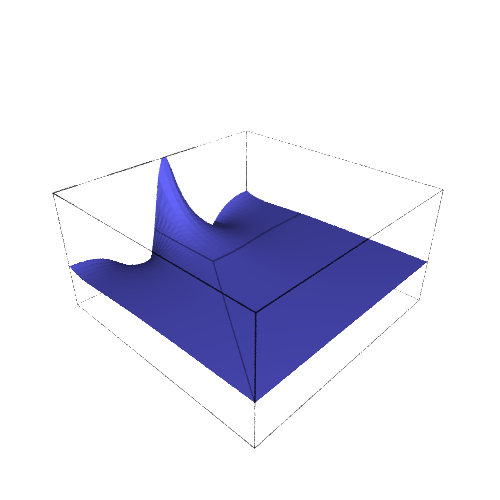

In [62]:
K1 = Kr.expr().subs(m=1, a=0.9, q=0.5)
plot3d(K1, (r,1,3), (th, 0, pi), viewer=viewer3D)